<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Supervisedlearning/LogReg/LogisticRegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement

The goal is to predict survival of passengers travelling in RMS Titanic using Logistic regression


    The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
    The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.



# 2. Collect Data

In [0]:
import pandas as pd

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv") 

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. Data Cleaning

### 3.1 Fill Null values

One most important point we can use model evaluation tech to find the null values.

  - linear regration
  - KNN
  - Tree based algo 

In [0]:
# fill null values
# Age,cabin and Emnarked has null values 
# we can remove cabin because of more than 60% of null values
# for age and Embarked we need to see data distribution

In [0]:
import seaborn as sns

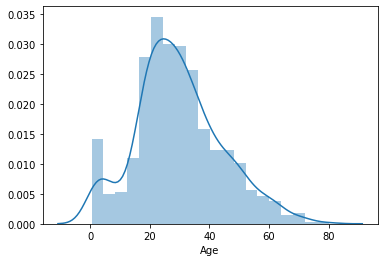

In [8]:
sns.distplot( titanic_data['Age'])
# distribution of age is almost normal distributed so we can take mean/median of it to fill NAN values

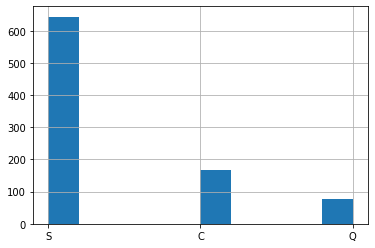

In [9]:
titanic_data.Embarked.hist()
# Embarked has max S value more than 600 so we can fill 3 values with S

In [0]:
titanic_data.drop(['Cabin','PassengerId'],axis=1,inplace=True)
# PassengerId has no use

In [0]:
titanic_data.Age.fillna(titanic_data.Age.median(),inplace=True)

In [0]:
titanic_data.Embarked.fillna('S',inplace = True)

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### 3.2 Feature Engineering

Feature Engineering is create new columns with existing one

In [0]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [0]:
titanic_data['Acompany'] = titanic_data['FamilySize'] -1

In [0]:
# we need more info about how many child adults or old are saved or died
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] <= 15 else x['Sex'],axis = 1)

In [0]:
titanic_data.drop(['Name','Sex','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null object
FamilySize     891 non-null int64
Acompany       891 non-null int64
GenderClass    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Now upto a mark we did some data cleaning and feature engg. now we need to feed the model.

Data should be consistant either numeric or catagoric(each column). 
Lets do an experiment and convert data in both numeric and catagoric

We need to convert all data to numeric.

In [19]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null object
FamilySize     891 non-null int64
Acompany       891 non-null int64
GenderClass    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [0]:
# we don't dummy for Pclass because Pclass is odinal discreat 1,2 and 3 has order meaning
# get_dummy is not part of feature engineering
data = pd.get_dummies(titanic_data,columns=['Embarked','GenderClass'])


In [21]:
data

,Survived,Pclass,Age,Fare,FamilySize,Acompany,Embarked_C,Embarked_Q,Embarked_S,GenderClass_child,GenderClass_female,GenderClass_male
0,0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,1,0,0,0,1,0
2,1,3,26.0,7.9250,1,0,0,0,1,0,1,0
3,1,1,35.0,53.1000,2,1,0,0,1,0,1,0
4,0,3,35.0,8.0500,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,0,0,1,0,0,1
887,1,1,19.0,30.0000,1,0,0,0,1,0,1,0
888,0,3,28.0,23.4500,4,3,0,0,1,0,1,0
889,1,1,26.0,30.0000,1,0,1,0,0,0,0,1


In [0]:
# now we will normalize the data Age and Fair has different units.


# Logistic Regaration Model

In [0]:
# step 1 Split data to X and y

In [0]:
y = data['Survived']
X = data.drop(['Survived'],axis = 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 1)
# random state first random and then same
# we should save X_tarin test data in other file so every time we run our model we will get same results

#### Base Model

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logReg = LogisticRegression()
# this is a base model

In [26]:
logReg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict = logReg.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(predict,y_test)
# this is a base model which is almost 80% accurate

0.7932960893854749

#### Gride Search 

In [0]:
from sklearn.model_selection import GridSearchCV
import numpy as np
grid = {'C':np.logspace(-3,3,7),"penalty":["l1","l2","elasticnet"],"tol":[0.01,0.001,0.0001]}
logReg_cv = GridSearchCV(logReg,grid,cv=10)

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
logReg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
predict =  logReg_cv.predict(X_test)

In [35]:
accuracy_score(predict,y_test)

0.7932960893854749

In [0]:
# both base model and grid model has same accuracy 

In [36]:
logReg_cv.best_params_

{'C': 100.0, 'penalty': 'l2', 'tol': 0.01}

#### Confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion = pd.DataFrame(confusion_matrix(y_test,predict))

In [50]:
print(confusion)


    0   1
0  94  12
1  25  48


#### probablity value for each class

In [51]:
logReg.predict_proba(X_train)

array([[0.95301946, 0.04698054],
       [0.03637691, 0.96362309],
       [0.17261722, 0.82738278],
       ...,
       [0.77172571, 0.22827429],
       [0.35765028, 0.64234972],
       [0.92006576, 0.07993424]])

In [0]:
test_kaggal = pd.read_csv('test.csv') 

In [55]:
test_kaggal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
test_kaggal.drop(['Cabin','PassengerId'],axis=1,inplace=True)
# PassengerId has no use

In [0]:
test_kaggal.Age.fillna(titanic_data.Age.median(),inplace=True)
test_kaggal.Embarked.fillna('S',inplace = True)

In [0]:
test_kaggal['FamilySize'] = test_kaggal['SibSp'] + test_kaggal['Parch'] + 1
test_kaggal['Acompany'] = test_kaggal['FamilySize'] -1
# we need more info about how many child adults or old are saved or died
test_kaggal['GenderClass'] = test_kaggal.apply(lambda x: 'child' if x['Age'] <= 15 else x['Sex'],axis = 1)
test_kaggal.drop(['Name','Sex','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [62]:
test_kaggal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass         418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null object
FamilySize     418 non-null int64
Acompany       418 non-null int64
GenderClass    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [0]:
test_kaggal.Fare.fillna(titanic_data.Fare.median(),inplace=True)

In [0]:
data_k = pd.get_dummies(test_kaggal,columns=['Embarked','GenderClass'])

In [0]:
data_k['Survived'] =  logReg.predict(data_k)

In [67]:
data_k

,Pclass,Age,Fare,FamilySize,Acompany,Embarked_C,Embarked_Q,Embarked_S,GenderClass_child,GenderClass_female,GenderClass_male,Survived
0,3,34.5,7.8292,1,0,0,1,0,0,0,1,0
1,3,47.0,7.0000,2,1,0,0,1,0,1,0,0
2,2,62.0,9.6875,1,0,0,1,0,0,0,1,0
3,3,27.0,8.6625,1,0,0,0,1,0,0,1,0
4,3,22.0,12.2875,3,2,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,8.0500,1,0,0,0,1,0,0,1,0
414,1,39.0,108.9000,1,0,1,0,0,0,1,0,1
415,3,38.5,7.2500,1,0,0,0,1,0,0,1,0
416,3,28.0,8.0500,1,0,0,0,1,0,0,1,0


In [0]:
test_kaggal = pd.read_csv('test.csv') 

In [70]:
test_kaggal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
 data_k['PassengerId'] =  test_kaggal['PassengerId']

In [0]:
dd = {'PassengerId':data_k['PassengerId'],'Survived': data_k['Survived'] }

In [0]:
final_titanic_data_result =  pd.DataFrame(dd,columns=['PassengerId','Survived']) 

In [0]:
final_titanic_data_result.to_csv('result.csv', index=False)